# 보고서 첨부용 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv(r'C:\Users\soug9\Desktop\occupancy_data\01_original\datatest.txt')
data2 = pd.read_csv(r'C:\Users\soug9\Desktop\occupancy_data\01_original\datatraining.txt')

In [4]:
data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
data2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
data = pd.concat([data1, data2])

In [11]:
data['datetime'] = pd.to_datetime(data['date'])

In [12]:
data = data.sort_values('datetime')

In [13]:
data.index = range(len(data))

In [19]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:19:00
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 14:19:59
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 14:21:00
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 14:22:00
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 14:23:00


In [20]:
data.to_csv(r'C:\Users\soug9\Desktop\occupancy_data\test1+train.txt')

## 어떤 시간 대에 사람이 있을까

In [15]:
data['Occupancy'].value_counts()

0    8107
1    2701
Name: Occupancy, dtype: int64

In [24]:
vc = data['Occupancy'].value_counts()

Text(1,3001,'2701')

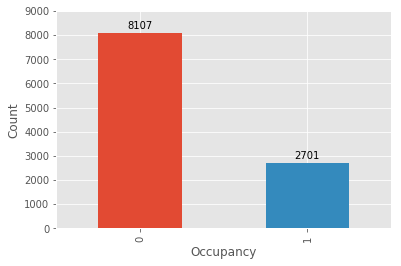

In [38]:
plt.style.use('ggplot')
data['Occupancy'].value_counts().plot.bar()
ax = plt.gca()
ax.set_ylim(0,9000)
ax.set_xlabel('Occupancy')
ax.set_ylabel('Count')
ax.text(0,vc[0]+300,vc[0],horizontalalignment='center',verticalalignment='center')
ax.text(1,vc[1]+300,vc[1],horizontalalignment='center',verticalalignment='center')

Text(1,3001,'2701')

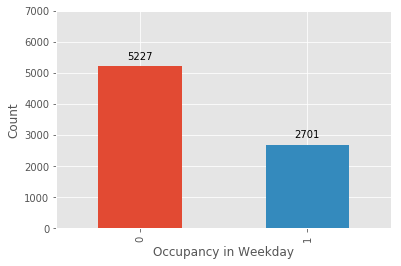

In [86]:
plt.style.use('ggplot')
vc_w = data['Occupancy'][(data['datetime'].dt.weekday !=5) & (data['datetime'].dt.weekday!=6)].value_counts()
vc_w.plot.bar()

ax = plt.gca()
ax.set_ylim(0,7000)
ax.set_xlim(-0.5, 1.5)
ax.set_xticks([0,1])
ax.set_xticklabels([0,1])
ax.set_xlabel('Occupancy in Weekday')
ax.set_ylabel('Count')
ax.text(0,vc_w[0]+300,vc_w[0],horizontalalignment='center',verticalalignment='center')
ax.text(1,vc_w[1]+300,vc_w[1],horizontalalignment='center',verticalalignment='center')

Text(1,300,'0')

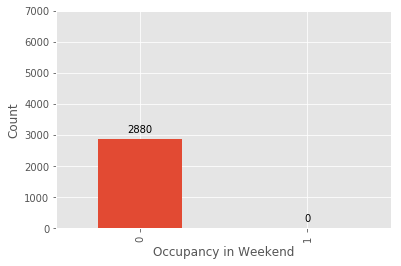

In [167]:
plt.style.use('ggplot')
vc_wk = data['Occupancy'][(data['datetime'].dt.weekday==5) | (data['datetime'].dt.weekday==6)].value_counts()
vc_wk.plot.bar()

ax = plt.gca()
ax.set_ylim(0,7000)
ax.set_xlim(-0.5, 1.5)
ax.set_xticks([0,1])
ax.set_xticklabels([0,1])
ax.set_xlabel('Occupancy in Weekend')
ax.set_ylabel('Count')
ax.text(0,vc_wk[0]+300,vc_wk[0],horizontalalignment='center',verticalalignment='center')
ax.text(1,300,0,horizontalalignment='center',verticalalignment='center')

In [35]:
# 2월 5일의 데이터
d = data[data['datetime'].dt.day == 5]
d['time'] = d['datetime'].dt.hour

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
d.index = range(len(d))

In [96]:
d.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime,time,min
1435,2015-02-05 23:55:00,20.2900,21.2900,0.0,439.5,0.003127,0,2015-02-05 23:55:00,23,5
1436,2015-02-05 23:55:59,20.2225,21.2225,0.0,445.0,0.003104,0,2015-02-05 23:55:59,23,5
1437,2015-02-05 23:57:00,20.2000,21.2000,0.0,442.5,0.003097,0,2015-02-05 23:57:00,23,5
1438,2015-02-05 23:57:59,20.2000,21.2000,0.0,443.5,0.003097,0,2015-02-05 23:57:59,23,5
1439,2015-02-05 23:58:59,20.2000,21.2000,0.0,444.0,0.003097,0,2015-02-05 23:58:59,23,5


Text(0,0.5,'Occupancy')

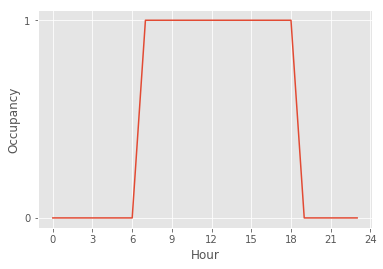

In [42]:
max_occ = d.groupby(by=['time'])['Occupancy'].max()
plt.plot(max_occ)
ax = plt.gca()
ax.set_yticks([0,1])
ax.set_xticks(range(0,25,3))
ax.set_xlabel('Hour')
ax.set_ylabel('Occupancy')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Occupancy')

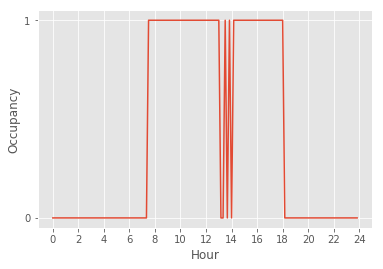

In [109]:
d['min'] = list(map(lambda x : str(x.minute)[0] if x.minute>10 else '0', d['datetime']))

max_occ2 = d.groupby(by=['time', 'min'])['Occupancy'].max()
max_occ2.index = range(0, len(max_occ2))
plt.plot(max_occ2)

ax = plt.gca()
ax.set_yticks([0,1])
ax.set_xticks(range(0,145,12))
ax.set_xticklabels(range(0,25,2))
ax.set_xlabel('Hour')
ax.set_ylabel('Occupancy')

Text(0,0.5,'Occupancy')

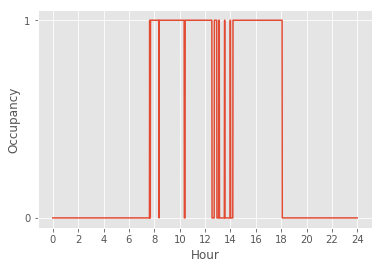

In [107]:
plt.plot(d['Occupancy'])

ax = plt.gca()
ax.set_yticks([0,1])
ax.set_xticks(range(0,1441,120))
ax.set_xticklabels(range(0,25,2))
ax.set_xlabel('Hour')
ax.set_ylabel('Occupancy')

## 사람이 있을 때와 없을 때 온도, 습도, CO2, 빛의 값의 차이가 있을까?

Text(0,0.5,'Count')

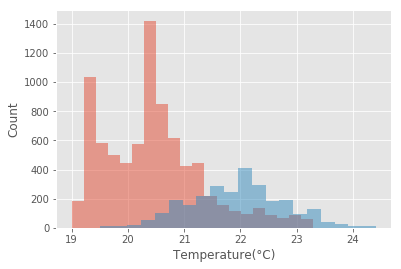

In [163]:
plt.style.use('ggplot')
plt.hist(data['Temperature'][data['Occupancy']==0], bins=20, alpha=0.5)
plt.hist(data['Temperature'][data['Occupancy']==1], bins=20, alpha=0.5)

ax = plt.gca()
ax.set_xlabel('Temperature(°C)')
ax.set_ylabel('Count')

Text(0,0.5,'Count')

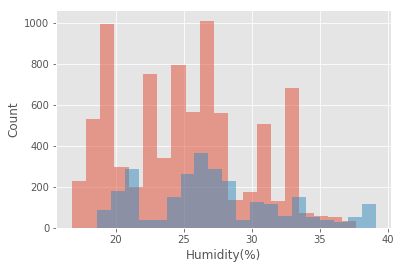

In [164]:
plt.style.use('ggplot')
plt.hist(data['Humidity'][data['Occupancy']==0], bins=20, alpha=0.5)
plt.hist(data['Humidity'][data['Occupancy']==1], bins=20, alpha=0.5)

ax = plt.gca()
ax.set_xlabel('Humidity(%)')
ax.set_ylabel('Count')

Text(0,0.5,'Count')

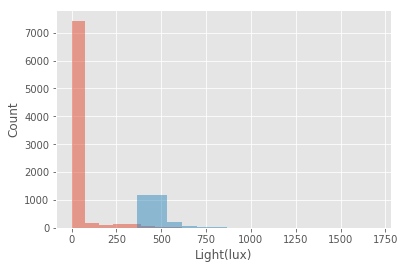

In [165]:
plt.style.use('ggplot')
plt.hist(data['Light'][data['Occupancy']==0], bins=20, alpha=0.5)
plt.hist(data['Light'][data['Occupancy']==1], bins=20, alpha=0.5)

ax = plt.gca()
ax.set_xlabel('Light(lux)')
ax.set_ylabel('Count')

Text(0,0.5,'Count')

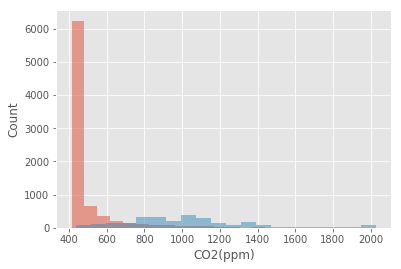

In [166]:
plt.style.use('ggplot')
plt.hist(data['CO2'][data['Occupancy']==0], bins=20, alpha=0.5)
plt.hist(data['CO2'][data['Occupancy']==1], bins=20, alpha=0.5)

ax = plt.gca()
ax.set_xlabel('CO2(ppm)')
ax.set_ylabel('Count')

In [137]:
def trend(feature, day, c) :
    d = data[data['datetime'].dt.day == day]
    d.index = range(len(d))

    ma = d[feature].rolling(window=30).mean()
    plt.plot(ma, color=c, alpha =0.7)
    
    return None

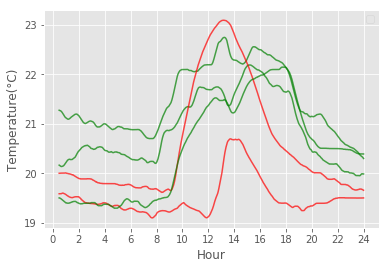

In [161]:
ax = plt.gca()
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature(°C)')
ax.set_xticks(range(0,1441,120))
ax.set_xticklabels(range(0,25,2))
ax.set_yticks([19,20,21,22,23])


trend('Temperature', 5, 'g')
trend('Temperature', 6, 'g')
trend('Temperature', 7, 'r')
trend('Temperature', 8, 'r')
trend('Temperature', 9, 'g')

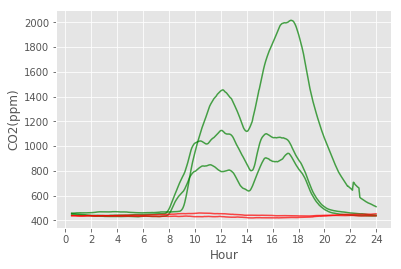

In [139]:
ax = plt.gca()
ax.set_xlabel('Hour')
ax.set_ylabel('CO2(ppm)')
ax.set_xticks(range(0,1441,120))
ax.set_xticklabels(range(0,25,2))
#ax.set_yticks([19,20,21,22,23])

trend('CO2', 5, 'g')
trend('CO2', 6, 'g')
trend('CO2', 7, 'r')
trend('CO2', 8, 'r')
trend('CO2', 9, 'g')

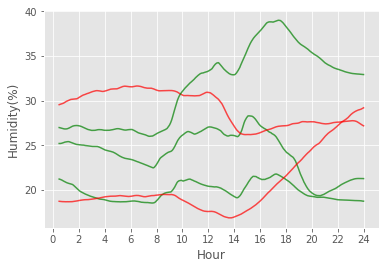

In [143]:
ax = plt.gca()
ax.set_xlabel('Hour')
ax.set_ylabel('Humidity(%)')
ax.set_xticks(range(0,1441,120))
ax.set_xticklabels(range(0,25,2))

trend('Humidity', 5, 'g')
trend('Humidity', 6, 'g')
trend('Humidity', 7, 'r')
trend('Humidity', 8, 'r')
trend('Humidity', 9, 'g')

In [142]:
data_pp = pd.read_csv(r'C:\Users\soug9\Desktop\occupancy_data\03_preprocessing\datatraining_pp_light.csv')

In [148]:
data_pp['datetime'] = pd.to_datetime(data_pp['date'])

In [149]:
data_pp = data_pp.sort_values('datetime')

In [154]:
def trend_pp(feature, day, c, a) :
    d = data_pp[data_pp['datetime'].dt.day == day]
    d.index = range(len(d))

    ma = d[feature].rolling(window=30).mean()
    plt.plot(ma, color=c, alpha =a)
    
    return None

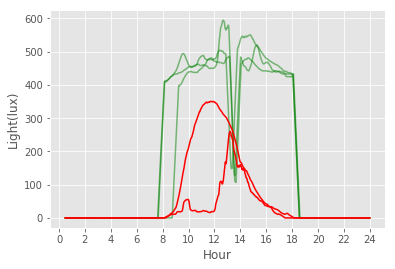

In [160]:
ax = plt.gca()
ax.set_xlabel('Hour')
ax.set_ylabel('Light(lux)')
ax.set_xticks(range(0,1441,120))
ax.set_xticklabels(range(0,25,2))

trend_pp('Light', 5, 'g', 0.5)
trend_pp('Light', 6, 'g', 0.5)
trend_pp('Light', 9, 'g', 0.5)
trend_pp('Light', 7, 'r', 1)
trend_pp('Light', 8, 'r', 1)